In [1]:
# import torch
import json
import os
import re
import os.path as osp
from matplotlib import pyplot as plt

In [2]:
import os
import shutil
import re

# experiments graphs

In [3]:
bs_info = dict()

# trivially increasing the batch size

main problem is **generalization gap** (train acc is high while test acc is not)
for 2048: **the optimization difficulty**

In [4]:
BASE_PATH = "./representatives/trivially/"
bs_pattern = r"bs-(\d+)"

In [5]:
local_bs_info = dict()
for f in os.scandir(BASE_PATH):
    print(f"file path: {f.path}")
    match = re.search(bs_pattern, f.name)
        
    if match:
        print(f"batch size: {match.group(1)}")
        with open(os.path.join(f.path, "info_dict"), "r") as infile:
            info = json.load(infile)
            local_bs_info[int(match.group(1))] = info
bs_info["trivially"] = local_bs_info
        

file path: ./representatives/trivially/sgd_bs-256_lr-0.025_lrDecay-0.1_warmupEpochs-1_epoch-200
batch size: 256
file path: ./representatives/trivially/sgd_bs-1024_lr-0.025_lrDecay-0.1_warmupEpochs-1_epoch-200
batch size: 1024
file path: ./representatives/trivially/sgd_bs-128_lr-0.025_lrDecay-0.1_warmupEpochs-1_epoch-200
batch size: 128
file path: ./representatives/trivially/sgd_bs-512_lr-0.025_lrDecay-0.1_warmupEpochs-1_epoch-200
batch size: 512
file path: ./representatives/trivially/sgd_bs-32_lr-0.025_lrDecay-0.1_warmupEpochs-1_epoch-200
batch size: 32
file path: ./representatives/trivially/sgd_bs-2048_lr-0.025_lrDecay-0.1_warmupEpochs-1_epoch-200
batch size: 2048


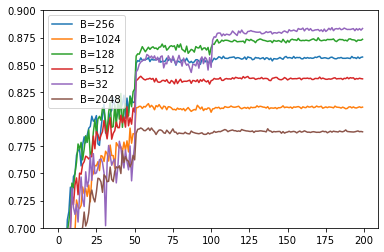

In [6]:
# test accuracy
plt.ylim(0.7, 0.9)
for key, val in bs_info["trivially"].items():
    
    plt.plot(range(200), val["test_acc"], label=f"B={key}")
plt.legend()

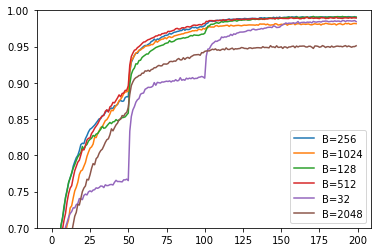

In [7]:
# train acc
plt.ylim(0.7, 1)
for key, val in bs_info["trivially"].items():
    
    plt.plot(range(200), val["train_acc"], label=f"B={key}")
plt.legend()

# linear scale rule + warmup

still, the main problem is generalization gap

In [11]:
BASE_PATH = "./representatives/linear/"
bs_pattern = r"bs-(\d+)"

In [12]:
local_bs_info = dict()
for f in os.scandir(BASE_PATH):
    print(f"file path: {f.path}")
    match = re.search(bs_pattern, f.name)
        
    if match:
        print(f"batch size: {match.group(1)}")
        with open(os.path.join(f.path, "info_dict"), "r") as infile:
            info = json.load(infile)
            local_bs_info[int(match.group(1))] = info
bs_info["linear"] = local_bs_info 

file path: ./representatives/linear/sgd_bs-256_lr-0.2_lrDecay-0.1_warmupEpochs-10_epoch-200
batch size: 256
file path: ./representatives/linear/sgd_bs-32_lr-0.025_lrDecay-0.1_warmupEpochs-1_epoch-200
batch size: 32
file path: ./representatives/linear/sgd_bs-2048_lr-1.6_lrDecay-0.1_warmupEpochs-10_epoch-200
batch size: 2048
file path: ./representatives/linear/sgd_bs-512_lr-0.4_lrDecay-0.1_warmupEpochs-10_epoch-200
batch size: 512
file path: ./representatives/linear/sgd_bs-128_lr-0.1_lrDecay-0.1_warmupEpochs-10_epoch-200
batch size: 128
file path: ./representatives/linear/sgd_bs-1024_lr-0.8_lrDecay-0.1_warmupEpochs-10_epoch-200
batch size: 1024


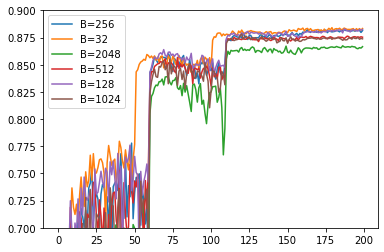

In [13]:
# test accuracy
plt.ylim(0.7, 0.9)
for key, val in bs_info["linear"].items():
    
    plt.plot(range(200), val["test_acc"], label=f"B={key}")
plt.legend()

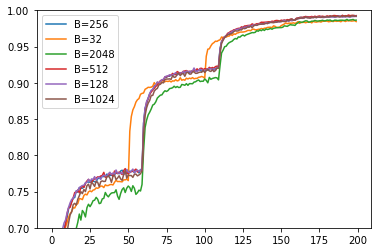

In [14]:
# train acc
plt.ylim(0.7, 1)
for key, val in bs_info["linear"].items():
    
    plt.plot(range(200), val["train_acc"], label=f"B={key}")
plt.legend()

# simulation of multiple worker

2048: the difficulty of optimization!

In [15]:
BASE_PATH = "./representatives/optimal/"
bs_pattern = r"bs-(\d+)"

local_bs_info = dict()
for f in os.scandir(BASE_PATH):
    print(f"file path: {f.path}")
    match = re.search(bs_pattern, f.name)
        
    if match:
        print(f"batch size: {match.group(1)}")
        with open(os.path.join(f.path, "info_dict"), "r") as infile:
            info = json.load(infile)
            local_bs_info[int(match.group(1))] = info
bs_info["optimal"] = local_bs_info         

file path: ./representatives/optimal/sgd_bs-512_lr-0.4_lrDecay-0.1_warmupEpochs-10_epoch-200_psuedo
batch size: 512
file path: ./representatives/optimal/sgd_bs-32_lr-0.025_lrDecay-0.1_warmupEpochs-1_epoch-200
batch size: 32
file path: ./representatives/optimal/sgd_bs-32_lr-0.025_lrDecay-0.1_warmupEpochs-1_epoch-200_true
batch size: 32
file path: ./representatives/optimal/sgd_bs-128_lr-0.1_lrDecay-0.1_warmupEpochs-10_epoch-200_psuedo
batch size: 128
file path: ./representatives/optimal/sgd_bs-2048_lr-1.6_lrDecay-0.1_warmupEpochs-10_epoch-200_psuedo
batch size: 2048
file path: ./representatives/optimal/sgd_bs-256_lr-0.2_lrDecay-0.1_warmupEpochs-10_epoch-200_psuedo
batch size: 256
file path: ./representatives/optimal/sgd_bs-1024_lr-0.8_lrDecay-0.1_warmupEpochs-10_epoch-200_psuedo
batch size: 1024


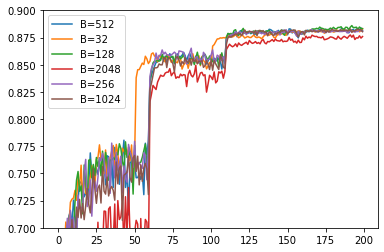

In [16]:
# test accuracy
plt.ylim(0.7, 0.9)
for key, val in bs_info["optimal"].items():
    if key == 4096: continue
    plt.plot(range(200), val["test_acc"], label=f"B={key}")
plt.legend()

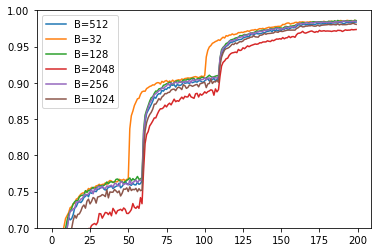

In [17]:
# train acc
plt.ylim(0.7, 1)
for key, val in bs_info["optimal"].items():
    if key == 4096: continue
    
    plt.plot(range(200), val["train_acc"], label=f"B={key}")
plt.legend()

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(columns=['exp', 'B', 'train_acc', "test_acc", "train_loss", "test_loss"])


In [20]:
df

,exp,B,train_acc,test_acc,train_loss,test_loss


In [21]:
def toStr(ints):
    strs = [str(item) for item in ints]
    return ",".join(strs)
for exp, exp_dict in bs_info.items():
    for bs, bs_dict in exp_dict.items():
#         print([exp, bs, toStr(bs_dict["train_acc"]), toStr(bs_dict["test_acc"]), toStr(bs_dict["train_loss"]), toStr(bs_dict["test_loss"])])
#         local_df = pd.DataFrame([[exp, bs, toStr(bs_dict["train_acc"]), toStr(bs_dict["test_acc"]), toStr(bs_dict["train_loss"]), toStr(bs_dict["test_loss"])]], columns=['exp', 'B', 'train_acc', "test_acc", "train_loss", "test_loss"])
        
#         local_df = pd.DataFrame({"exp": exp, "B": bs, 'train_acc': toStr(bs_dict["train_acc"]), "test_acc": toStr(bs_dict["test_acc"]), "train_loss": toStr(bs_dict["train_loss"]), "test_loss": toStr(bs_dict["test_loss"])}, columns=['exp', 'B', 'train_acc', "test_acc", "train_loss", "test_loss"])
#         print({"exp": exp, "B": bs, 'train_acc': bs_dict["train_acc"], "test_acc": bs_dict["test_acc"], "train_loss": bs_dict["train_loss"], "test_loss": bs_dict["test_loss"]})
        df = df.append({"exp": exp, "B": bs, 'train_acc': bs_dict["train_acc"], "test_acc": bs_dict["test_acc"], "train_loss": bs_dict["train_loss"], "test_loss": bs_dict["test_loss"]}, ignore_index=True)
#         print(local_df)

In [22]:
df

,exp,B,train_acc,test_acc,train_loss,test_loss
0,trivially,256,"[0.37242, 0.50746, 0.5797, 0.62534, 0.65482, 0...","[0.4615, 0.5176, 0.6246, 0.6523, 0.6717, 0.672...","[1.7458942812316272, 1.3780616199483677, 1.182...","[1.6463617992401123, 1.454185209274292, 1.1009..."
1,trivially,1024,"[0.33782, 0.47186, 0.52544, 0.56622, 0.5969, 0...","[0.4485, 0.4985, 0.5588, 0.5957, 0.6169, 0.636...","[1.8112506404214976, 1.4483020305633545, 1.309...","[1.500721070766449, 1.3830440878868102, 1.2348..."
2,trivially,128,"[0.36762, 0.49786, 0.57476, 0.61946, 0.65618, ...","[0.4849, 0.567, 0.6094, 0.6331, 0.679, 0.6893,...","[1.7829963874329082, 1.4064314731246674, 1.201...","[1.4350456392765045, 1.25778759598732, 1.10210..."
3,trivially,512,"[0.35784, 0.494, 0.55552, 0.59948, 0.63366, 0....","[0.4421, 0.504, 0.5851, 0.6329, 0.6247, 0.6718...","[1.763270037514823, 1.4080106920125532, 1.2388...","[1.6282185339927673, 1.388082753419876, 1.1960..."
4,trivially,32,"[0.33146, 0.45998, 0.52134, 0.58374, 0.62058, ...","[0.4167, 0.4753, 0.5963, 0.6025, 0.6647, 0.693...","[0.061140742167229846, 0.04658863141594106, 0....","[0.01879152913093567, 0.0165434619307518, 0.01..."
5,trivially,2048,"[0.27934, 0.41718, 0.47626, 0.51388, 0.54528, ...","[0.3794, 0.4658, 0.5221, 0.5416, 0.5407, 0.577...","[1.966547212600708, 1.5723286056518555, 1.4275...","[1.6653790152072907, 1.4605013263225555, 1.329..."
6,linear,256,"[0.37584, 0.48024, 0.54744, 0.57038, 0.61906, ...","[0.4674, 0.5604, 0.573, 0.5182, 0.6637, 0.672,...","[1.724488194499697, 1.4700474726910493, 1.2893...","[1.6077760899066924, 1.2797583627700806, 1.253..."
7,linear,32,"[0.33146, 0.45998, 0.52134, 0.58374, 0.62058, ...","[0.4167, 0.4753, 0.5963, 0.6025, 0.6647, 0.693...","[0.061140742167229846, 0.04658863141594106, 0....","[0.01879152913093567, 0.0165434619307518, 0.01..."
8,linear,2048,"[0.16762, 0.2773, 0.29248, 0.34606, 0.40686, 0...","[0.2182, 0.2124, 0.2774, 0.3747, 0.3996, 0.456...","[3.229759292602539, 1.943243956565857, 1.93707...","[13.191173360347747, 94.8771235370636, 1.94915..."
9,linear,512,"[0.35364, 0.46328, 0.531, 0.58616, 0.62634, 0....","[0.4605, 0.5168, 0.5839, 0.6016, 0.6543, 0.590...","[1.7928508422812637, 1.5181486740404246, 1.324...","[1.5191598081588744, 1.3511529123783113, 1.143..."


# trivial vs. linear vs. optimal

to see the supermacy of optimal strategy

1. ease the optimization difficulty
2. fill the generalization gap

representative batch: 256, 512, 1024, 2048

In [23]:
BATCH_SIZES = [256, 512, 1024, 2048]

In [24]:
df[df["B"].isin(BATCH_SIZES)]

,exp,B,train_acc,test_acc,train_loss,test_loss
0,trivially,256,"[0.37242, 0.50746, 0.5797, 0.62534, 0.65482, 0...","[0.4615, 0.5176, 0.6246, 0.6523, 0.6717, 0.672...","[1.7458942812316272, 1.3780616199483677, 1.182...","[1.6463617992401123, 1.454185209274292, 1.1009..."
1,trivially,1024,"[0.33782, 0.47186, 0.52544, 0.56622, 0.5969, 0...","[0.4485, 0.4985, 0.5588, 0.5957, 0.6169, 0.636...","[1.8112506404214976, 1.4483020305633545, 1.309...","[1.500721070766449, 1.3830440878868102, 1.2348..."
3,trivially,512,"[0.35784, 0.494, 0.55552, 0.59948, 0.63366, 0....","[0.4421, 0.504, 0.5851, 0.6329, 0.6247, 0.6718...","[1.763270037514823, 1.4080106920125532, 1.2388...","[1.6282185339927673, 1.388082753419876, 1.1960..."
5,trivially,2048,"[0.27934, 0.41718, 0.47626, 0.51388, 0.54528, ...","[0.3794, 0.4658, 0.5221, 0.5416, 0.5407, 0.577...","[1.966547212600708, 1.5723286056518555, 1.4275...","[1.6653790152072907, 1.4605013263225555, 1.329..."
6,linear,256,"[0.37584, 0.48024, 0.54744, 0.57038, 0.61906, ...","[0.4674, 0.5604, 0.573, 0.5182, 0.6637, 0.672,...","[1.724488194499697, 1.4700474726910493, 1.2893...","[1.6077760899066924, 1.2797583627700806, 1.253..."
8,linear,2048,"[0.16762, 0.2773, 0.29248, 0.34606, 0.40686, 0...","[0.2182, 0.2124, 0.2774, 0.3747, 0.3996, 0.456...","[3.229759292602539, 1.943243956565857, 1.93707...","[13.191173360347747, 94.8771235370636, 1.94915..."
9,linear,512,"[0.35364, 0.46328, 0.531, 0.58616, 0.62634, 0....","[0.4605, 0.5168, 0.5839, 0.6016, 0.6543, 0.590...","[1.7928508422812637, 1.5181486740404246, 1.324...","[1.5191598081588744, 1.3511529123783113, 1.143..."
11,linear,1024,"[0.29586, 0.39852, 0.45782, 0.4712, 0.53612, 0...","[0.4184, 0.4377, 0.493, 0.4191, 0.5388, 0.6032...","[2.1611944801953373, 1.7201737141122624, 1.524...","[1.6039140260219573, 1.5919189000129699, 1.421..."
12,optimal,512,"[0.34406, 0.45582, 0.52294, 0.57318, 0.61342, ...","[0.4622, 0.5086, 0.6046, 0.6141, 0.6626, 0.663...","[1.8174440082238645, 1.5367364859094426, 1.369...","[1.491212216615677, 1.3791621208190918, 1.1225..."
15,optimal,2048,"[0.11948, 0.13924, 0.18776, 0.23432, 0.27348, ...","[0.1099, 0.1632, 0.2294, 0.2504, 0.2809, 0.354...","[5.293836832046509, 2.9771508598327636, 2.1401...","[23.412334442138672, 3.212755401134491, 2.0206..."


In [25]:
baseline = df[(df["B"] == 32) & (df["exp"] == "trivially") ]
baseline = list(baseline.itertuples())[0]

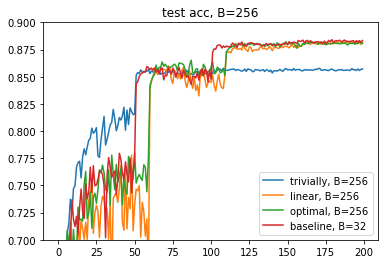

In [26]:
B_ = 256
tmp = df[df["B"] == B_]
plt.ylim(0.7, 0.9)
plt.title(f"test acc, B={B_}")
for row in tmp.itertuples():
    plt.plot(range(200), row.test_acc, label=f"{row.exp}, B={B_}")
plt.plot(range(200), baseline.test_acc, label=f"baseline, B=32")
#     print(row.exp)
# plt.plot()
plt.legend()

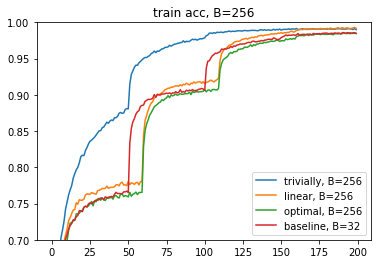

In [27]:
B_ = 256
tmp = df[df["B"] == B_]
plt.ylim(0.7, 1)
plt.title(f"train acc, B={B_}")
for row in tmp.itertuples():
    plt.plot(range(200), row.train_acc, label=f"{row.exp}, B={B_}")
plt.plot(range(200), baseline.train_acc, label=f"baseline, B=32")
#     print(row.exp)
# plt.plot()
plt.legend()

**for B = 256, optimal fill the generalization gap**

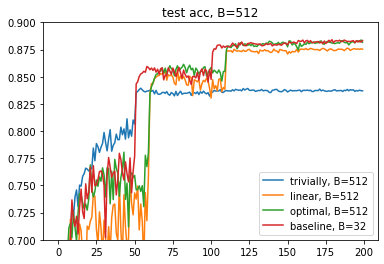

In [28]:
B_ = 512
tmp = df[df["B"] == B_]
plt.ylim(0.7, 0.9)
plt.title(f"test acc, B={B_}")

for row in tmp.itertuples():
    plt.plot(range(200), row.test_acc, label=f"{row.exp}, B={B_}")
plt.plot(range(200), baseline.test_acc, label=f"baseline, B=32")

#     print(row.exp)
# plt.plot()
plt.legend()

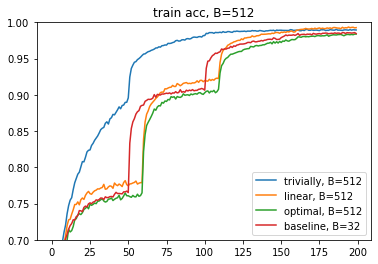

In [29]:

tmp = df[df["B"] == B_]
plt.ylim(0.7, 1)
plt.title(f"train acc, B={B_}")
for row in tmp.itertuples():
    plt.plot(range(200), row.train_acc, label=f"{row.exp}, B={B_}")
plt.plot(range(200), baseline.train_acc, label=f"baseline, B=32")
#     print(row.exp)
# plt.plot()
plt.legend()

**for B = 512, optimal fill the generalization gap**

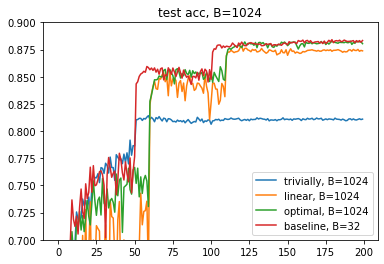

In [30]:
B_ = 1024
tmp = df[df["B"] == B_]
plt.title(f"test acc, B={B_}")

plt.ylim(0.7, 0.9)
for row in tmp.itertuples():
    plt.plot(range(200), row.test_acc, label=f"{row.exp}, B={B_}")
#     print(row.exp)
# plt.plot()
plt.plot(range(200), baseline.test_acc, label=f"baseline, B=32")

plt.legend()

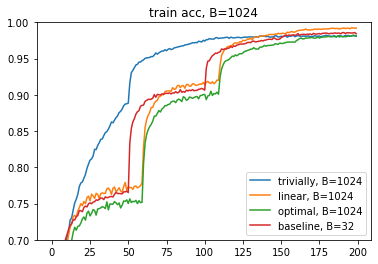

In [31]:
tmp = df[df["B"] == B_]
plt.ylim(0.7, 1)
plt.title(f"train acc, B={B_}")
for row in tmp.itertuples():
    plt.plot(range(200), row.train_acc, label=f"{row.exp}, B={B_}")
plt.plot(range(200), baseline.train_acc, label=f"baseline, B=32")
#     print(row.exp)
# plt.plot()
plt.legend()

**for B = 1024, optimal fill the generalization gap**

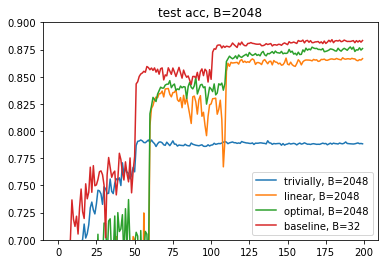

In [32]:
B_ = 2048
tmp = df[df["B"] == B_]
plt.ylim(0.7, 0.9)
plt.title(f"test acc, B={B_}")

for row in tmp.itertuples():
    plt.plot(range(200), row.test_acc, label=f"{row.exp}, B={B_}")
#     print(row.exp)
# plt.plot()
plt.plot(range(200), baseline.test_acc, label=f"baseline, B=32")

plt.legend()

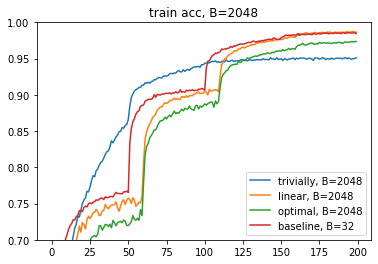

In [33]:
tmp = df[df["B"] == B_]
plt.ylim(0.7, 1)
plt.title(f"train acc, B={B_}")
for row in tmp.itertuples():
    plt.plot(range(200), row.train_acc, label=f"{row.exp}, B={B_}")
plt.plot(range(200), baseline.train_acc, label=f"baseline, B=32")
#     print(row.exp)
# plt.plot()
plt.legend()

- **for B = 1024, optimal fill the generalization gap and ease the difficulty of optimization at the same time**
- linear policy is the best policy to ease the diffculity of optimization, but it cannot recover the generalization ability of baseline model


# why can't we scale further?

2048, 4096 case study